In [29]:
import pandas as pd
import numpy as np

# Example: Generate sample continuous data
df = pd.read_csv("/Users/rachel/Desktop/binf5507git/BINF5507/Capstone/Iris_Data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


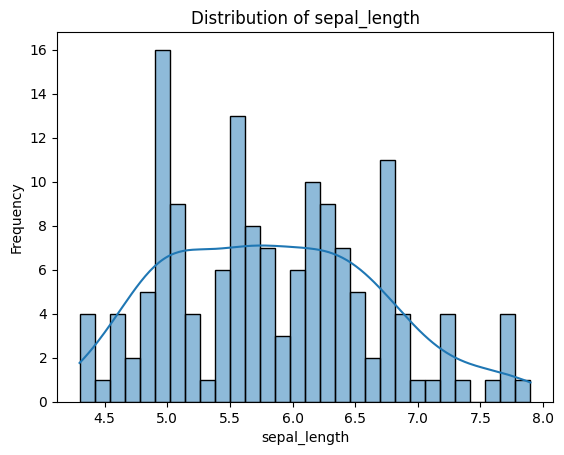

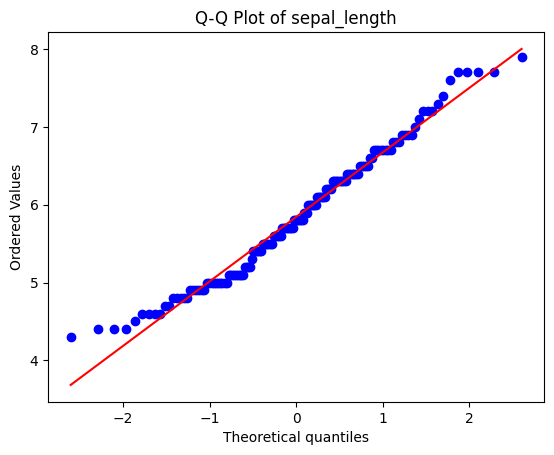

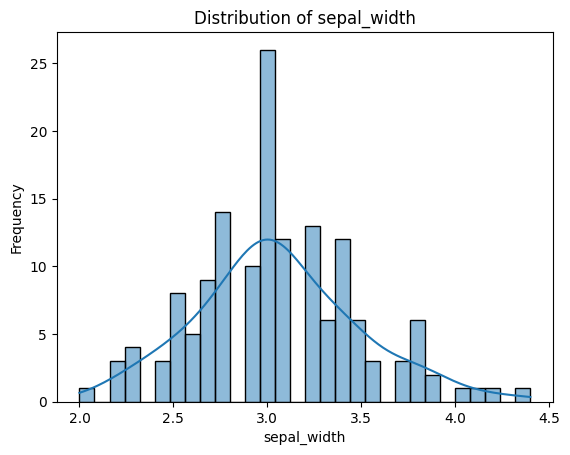

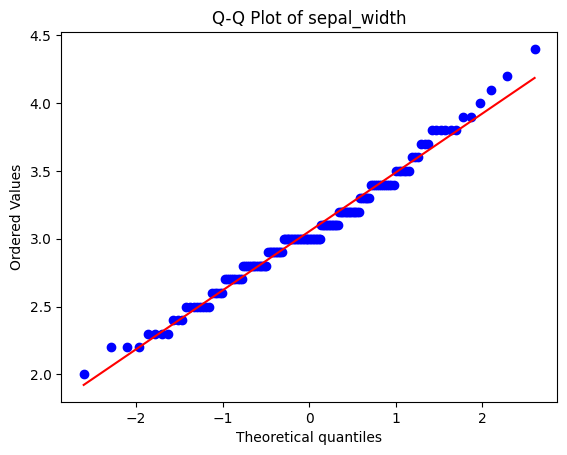

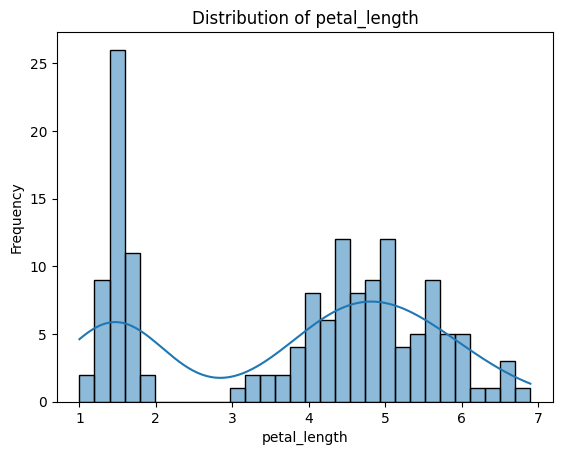

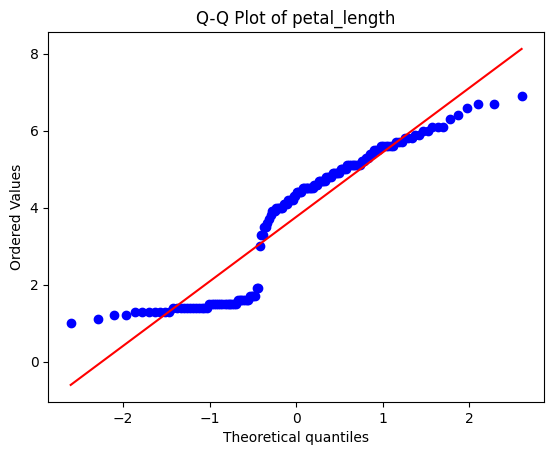

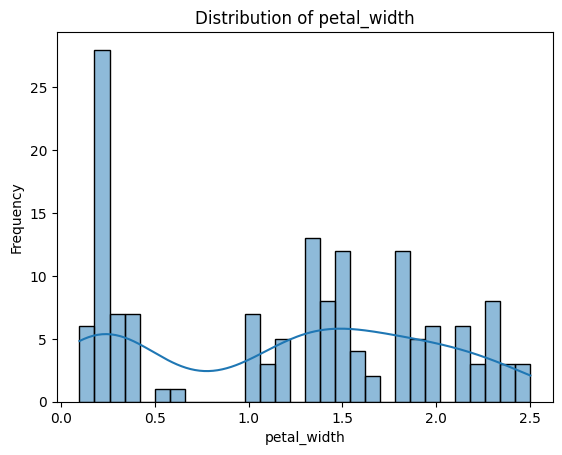

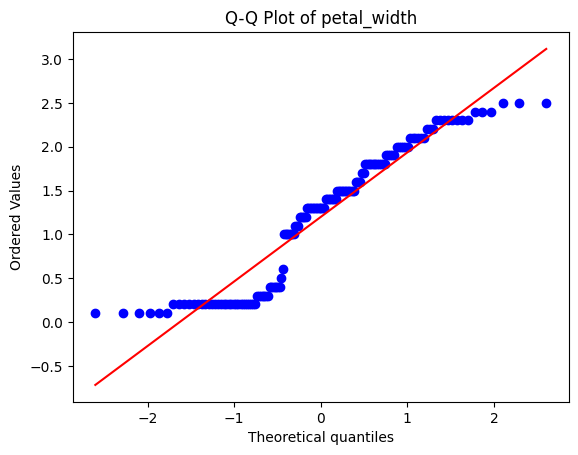

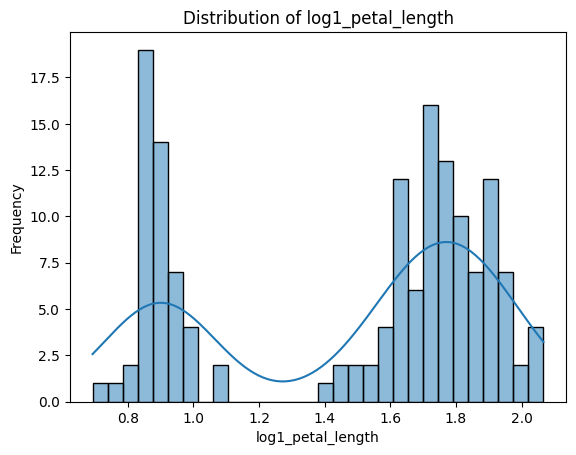

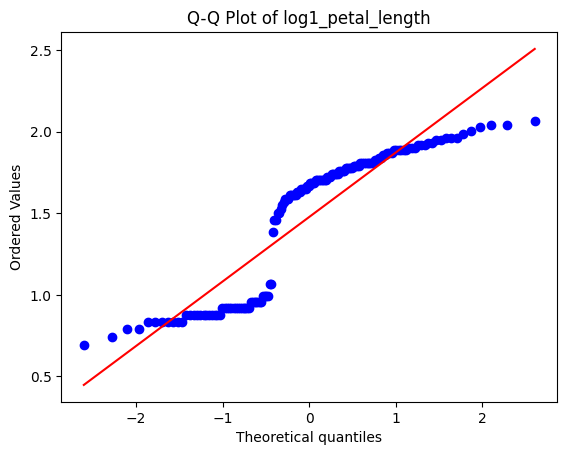

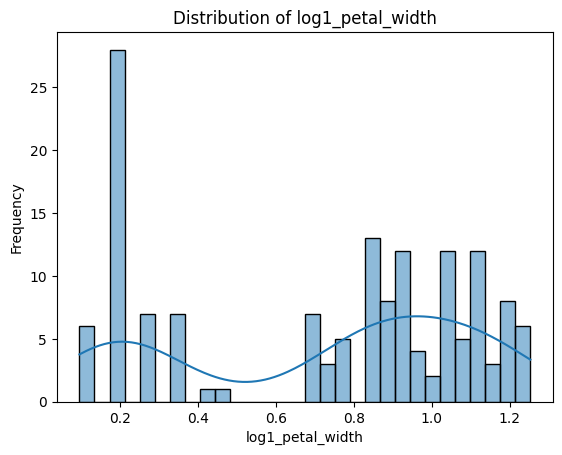

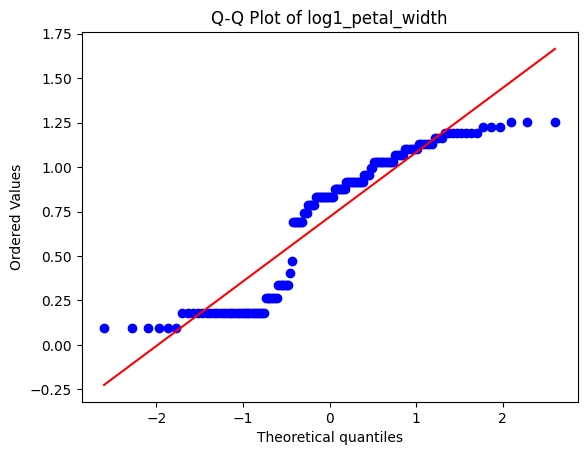

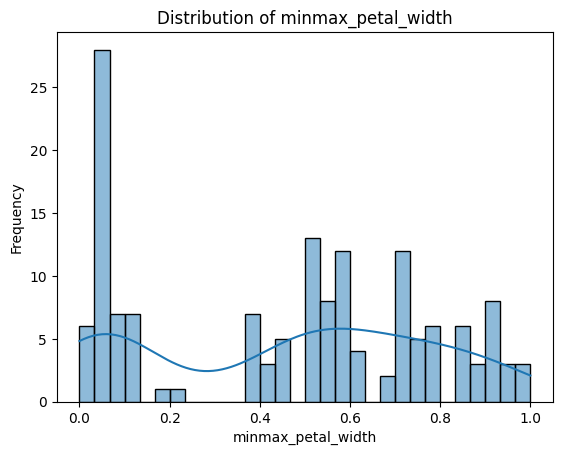

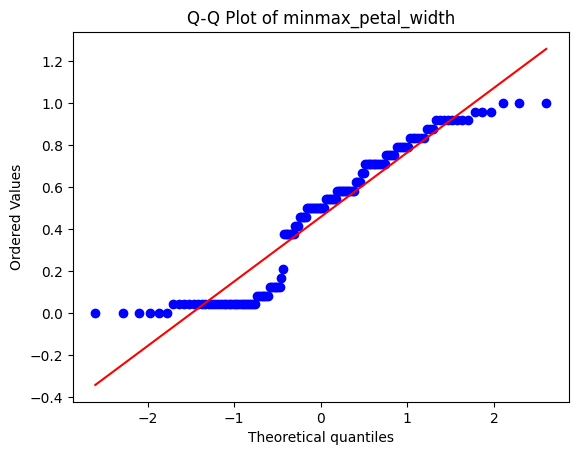

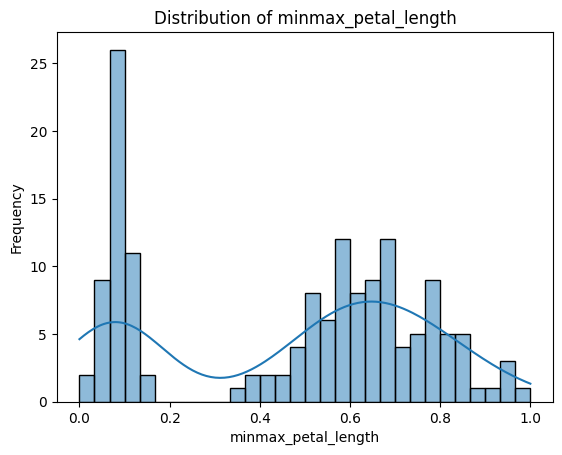

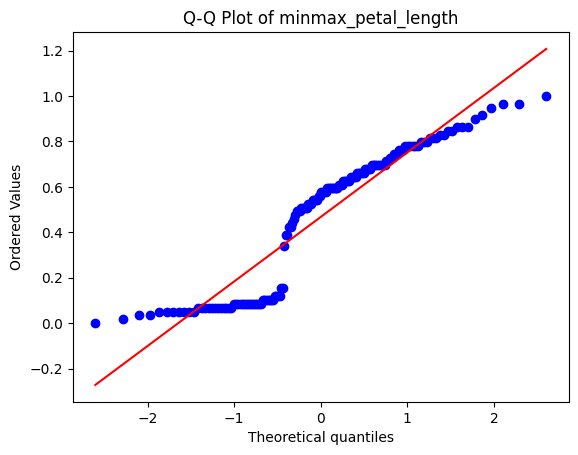

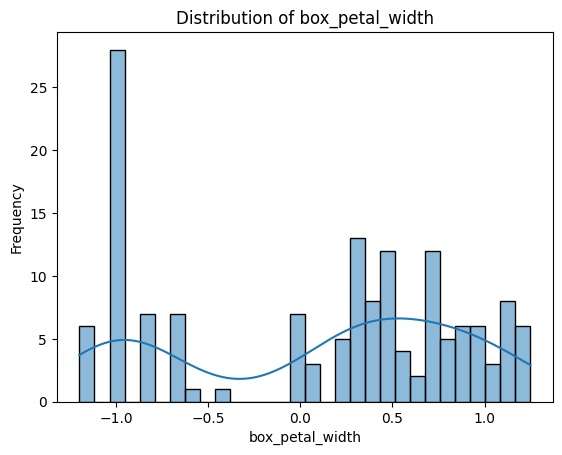

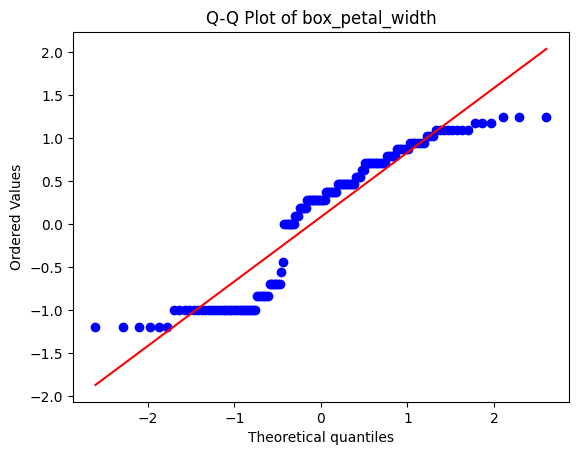

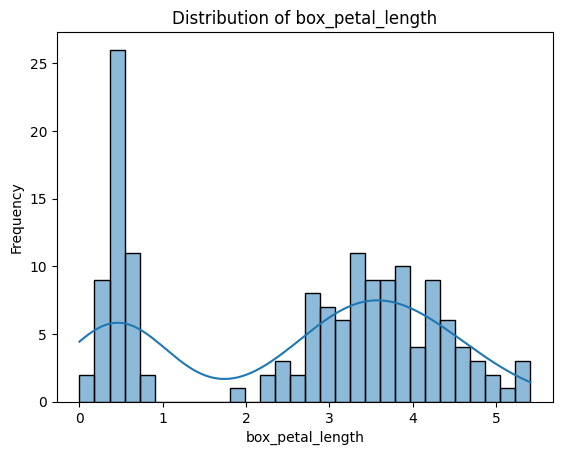

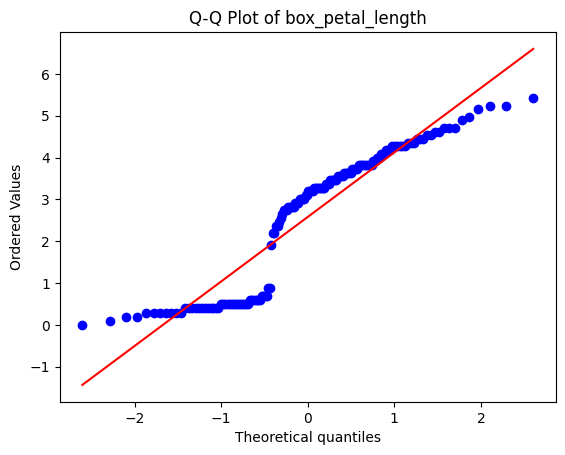

In [32]:
## Checking if features follow the normal distribution with and without transformation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt



df_features = df.drop('species', axis=1)
column_list = df_features.columns

# Apply square root transformation to non normal features 
df_features['log1_petal_length'] = np.log1p(df_features['petal_length'])
df_features['log1_petal_width'] = np.log1p(df_features['petal_width'])

from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_features['minmax_petal_width'] = scaler.fit_transform(df_features[['petal_width']])
df_features['minmax_petal_length'] = scaler.fit_transform(df_features[['petal_length']])

from scipy import stats

# Apply Box-Cox transformation (only works for positive values)
df_features['box_petal_width'], lambda_value = stats.boxcox(df_features['petal_width'])
df_features['box_petal_length'], lambda_value = stats.boxcox(df_features['petal_length'])



for column in column_list:
    # Plot histogram and KDE
    sns.histplot(df_features[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    # Q-Q plot
    stats.probplot(df_features[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column}")
    plt.show()


In [44]:
# Testing model performance using log transformed values for petal length and width

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df_features[['sepal_length', 'sepal_width', 'log1_petal_length', 'log1_petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [42]:
# Testing model performance using minmax normalized values for petal length and width
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['sepal_length', 'sepal_width', 'minmax_petal_length', 'minmax_petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [45]:
# Testing model performance using untransformed values for petal length and petal width
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

